<a href="https://colab.research.google.com/github/alantang1369/fashion_mnist_multilabel_classification_in_tensorflow/blob/main/fashion_mnist_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

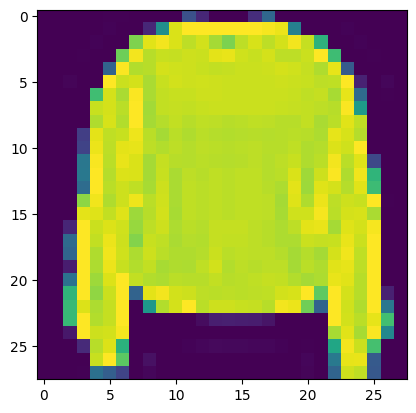

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [5]:
# Check out samples label
train_labels[7]

2

In [6]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

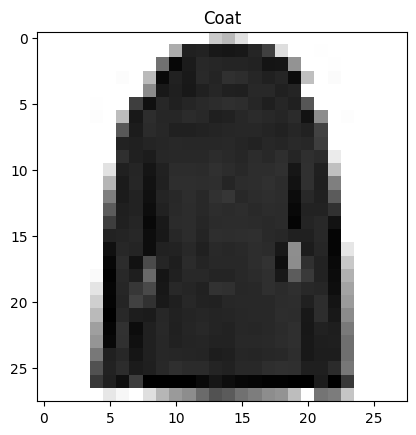

In [7]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

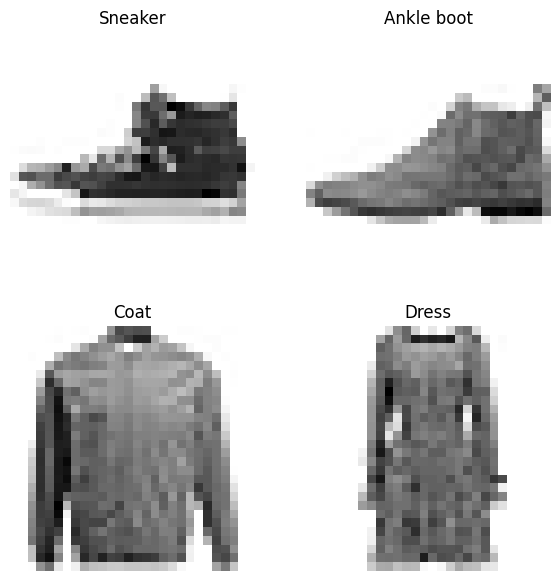

In [8]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model


In [9]:
# our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [10]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 2.3977 - accuracy: 0.0974 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3031 - accuracy: 0.1010 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3030 - accuracy: 0.0977 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3029 - val_accurac

In [12]:
# Check the model summary
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

## Normalizing our data

In [14]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [15]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4184 - accuracy: 0.4457 - val_loss: 1.1255 - val_accuracy: 0.5560
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0022 - accuracy: 0.6133 - val_loss: 0.9162 - val_accuracy: 0.6503
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8770 - accuracy: 0.6656 - val_loss: 0.8633 - val_accuracy: 0.6729
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8322 - accuracy: 0.6787 - val_loss: 0.8385 - val_accuracy: 0.6844
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8034 - accuracy: 0.6941 - val_loss: 0.7691 - val_accuracy: 0.7268
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6944 - accuracy: 0.7533 - val_loss: 0.7208 - val_accuracy: 0.7441
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6485 - accuracy: 0.7693 - val_loss: 0.6567 - val_accuracy:

<Axes: title={'center': 'Normailzed data'}>

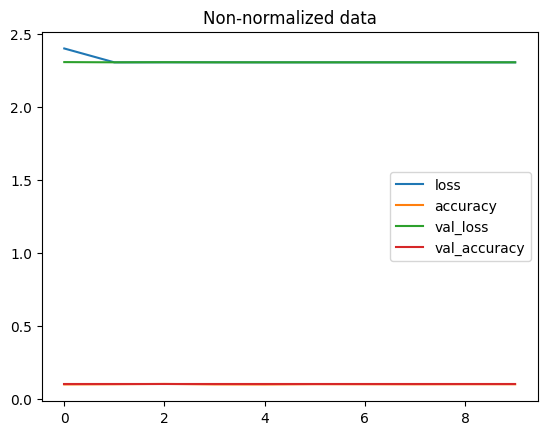

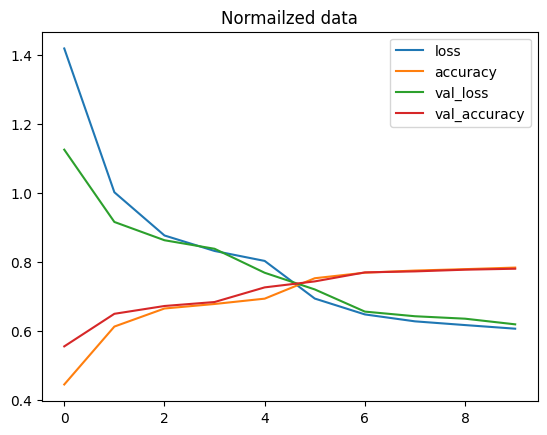

In [16]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normailzed data")

## Finding the ideal learning rate

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3005 - accuracy: 0.4664 - val_loss: 1.0076 - val_accuracy: 0.5832 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9101 - accuracy: 0.6521 - val_loss: 0.8658 - val_accuracy: 0.6960 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8083 - accuracy: 0.7129 - val_loss: 0.7829 - val_accuracy: 0.7397 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7181 - accuracy: 0.7428 - val_loss: 0.7103 - val_accuracy: 0.7503 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6745 - accuracy: 0.7524 - val_loss: 0.6783 - val_accuracy: 0.7593 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6491 - accuracy: 0.7607 - val_loss: 0.6778 - val_accuracy: 0.7555 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

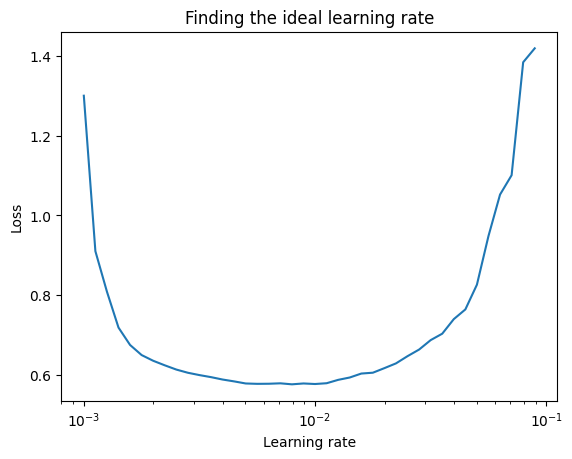

In [18]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [19]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3602 - accuracy: 0.4842 - val_loss: 1.0759 - val_accuracy: 0.5934
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9845 - accuracy: 0.6324 - val_loss: 0.9506 - val_accuracy: 0.6373
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8941 - accuracy: 0.6543 - val_loss: 0.9012 - val_accuracy: 0.6575
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8481 - accuracy: 0.6783 - val_loss: 0.8745 - val_accuracy: 0.6725
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8212 - accuracy: 0.6969 - val_loss: 0.8411 - val_accuracy: 0.6987
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8040 - accuracy: 0.7044 - val_loss: 0.8279 - val_accuracy: 0.6992
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7914 - accuracy: 0.7111 - val_loss: 0.8233 - val_accuracy:

In [20]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [21]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [22]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.4786792e-07, 3.6965830e-03, 4.0165342e-09, 4.4523818e-05,
        8.6542121e-07, 5.9409741e-02, 3.1288647e-07, 7.3792720e-01,
        2.9618118e-04, 1.9862442e-01],
       [6.0243595e-02, 2.7118555e-12, 7.3474014e-01, 1.2607191e-04,
        6.6419141e-03, 2.1449358e-34, 1.9824828e-01, 0.0000000e+00,
        2.4442402e-08, 0.0000000e+00],
       [3.2005571e-06, 9.9482042e-01, 1.1100402e-10, 4.5203562e-03,
        1.2841851e-08, 1.7349729e-11, 1.6894718e-07, 7.3028720e-13,
        5.7385019e-05, 5.9843971e-04],
       [5.7549227e-07, 9.9762625e-01, 1.1505227e-12, 2.3632227e-03,
        1.1317150e-10, 1.1629617e-16, 7.2370860e-09, 7.2825085e-19,
        1.8879455e-06, 8.1544586e-06],
       [2.8196377e-01, 1.2533939e-04, 7.6387979e-02, 1.5539230e-01,
        7.3740445e-02, 4.4824246e-17, 4.1026187e-01, 5.2842442e-33,
        2.1281466e-03, 1.0320749e-23]], dtype=float32)

In [23]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.4786792e-07, 3.6965830e-03, 4.0165342e-09, 4.4523818e-05,
        8.6542121e-07, 5.9409741e-02, 3.1288647e-07, 7.3792720e-01,
        2.9618118e-04, 1.9862442e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 'Sneaker')

In [24]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([7, 2, 1, 1, 6, 1, 4, 4, 5, 7])

In [25]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[688,   2,  39, 127,  43,   1,  86,   0,  14,   0],
       [  1, 920,   1,  59,   9,   1,   9,   0,   0,   0],
       [ 15,   1, 587,  20, 256,   2, 106,   0,  13,   0],
       [ 29,  15,   7, 838,  42,   2,  57,   0,  10,   0],
       [  1,   0, 142,  45, 712,   0,  62,   0,  38,   0],
       [  0,   8,   0,   1,   0, 823,   0, 123,  28,  17],
       [141,   3, 241,  81, 327,   2, 173,   0,  32,   0],
       [  0,   0,   0,   0,   0,  79,   0, 839,   1,  81],
       [  0,   1,   7,  15,  52,  28,   4,   2, 889,   2],
       [  0,   2,   0,   0,   1,   2,   0, 114,   1, 880]])

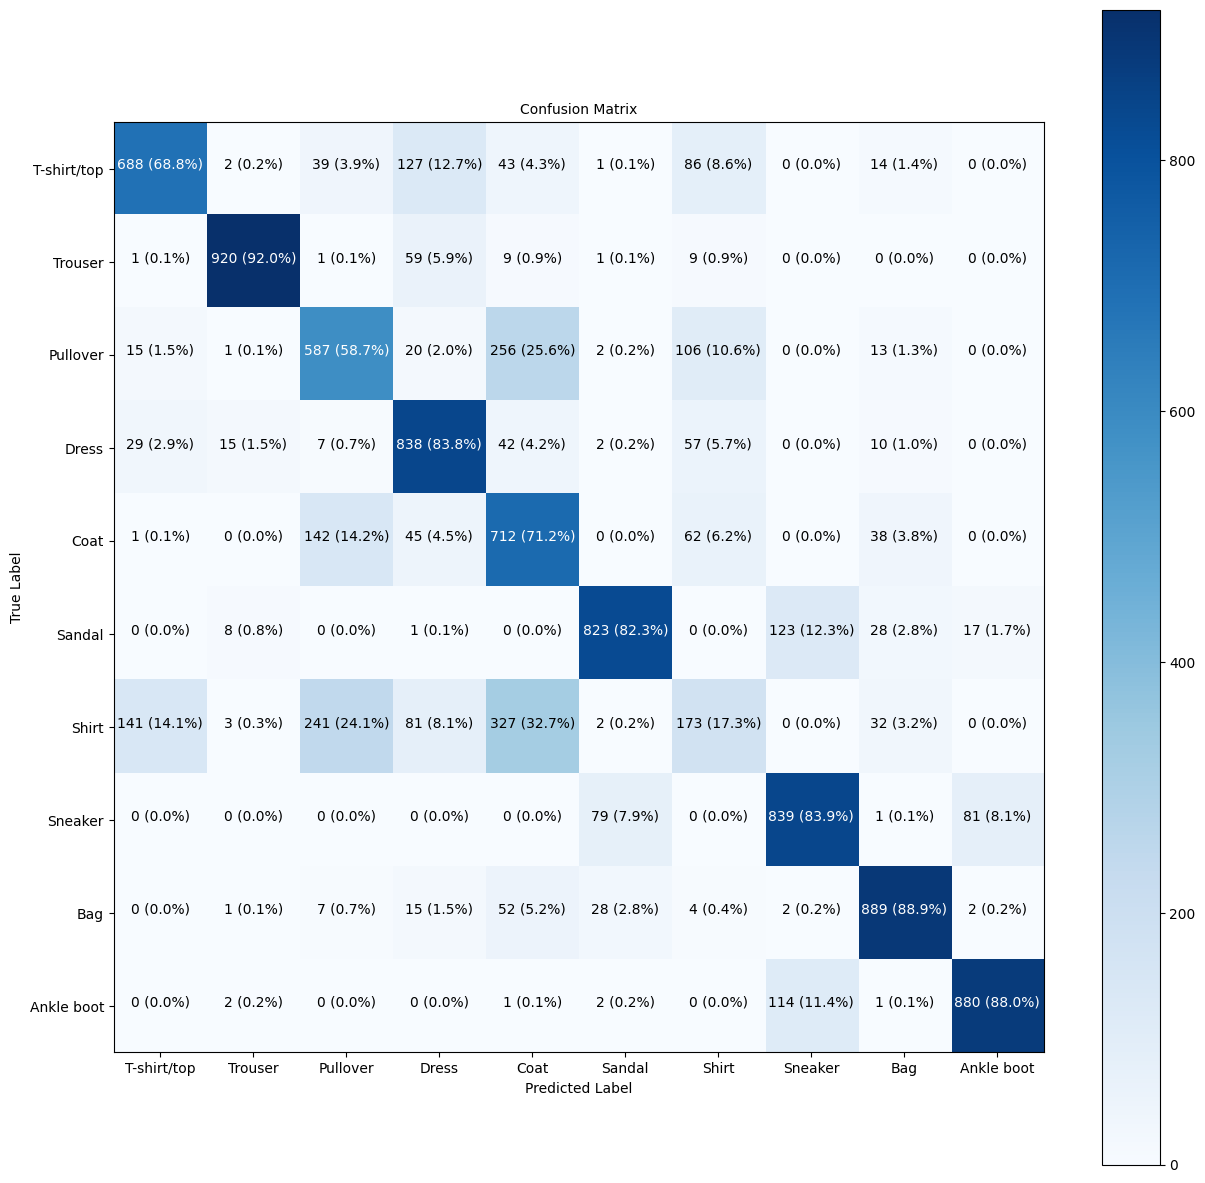

In [27]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [28]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 35ms/step


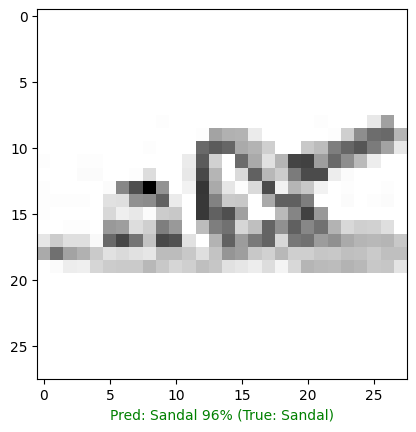

In [29]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)